In [1]:
!pip install xlrd==2.0.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 640.0 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 388.9 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00


In [3]:
# Load the Excel file
file_path = 'C:\\Users\\ishar\\Downloads\\Data-&-Problem-Statement---Project----1\\Credit Banking_Project - 1.xls'
customer_acquisition = pd.read_excel(file_path, sheet_name='Customer Acqusition')
spend = pd.read_excel(file_path, sheet_name='Spend')
repayment = pd.read_excel(file_path, sheet_name='Repayment')

In [5]:
# 1. Monthly Spend of Each Customer
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y')
spend['Month_Number'] = spend['Month'].dt.month
monthly_spend = spend.groupby(['Customer', 'Month_Number'])['Amount'].sum().reset_index()
monthly_spend.columns = ['Customer', 'Month', 'TotalSpend']
print(monthly_spend)

    Customer  Month    TotalSpend
0         A1      1  1.909577e+06
1         A1      2  1.445574e+06
2         A1      4  5.645069e+05
3         A1      5  1.311966e+05
4         A1      8  1.293883e+05
..       ...    ...           ...
573      A95      1  3.478339e+05
574      A96      1  3.203635e+05
575      A97      1  1.643300e+05
576      A98      1  8.748351e+04
577      A99      1  4.760204e+05

[578 rows x 3 columns]


In [7]:
# 2. Monthly Repayment of Each Customer
repayment['Month'] = pd.to_datetime(repayment['Month'], format='%d-%b-%y')
repayment['Month_Number'] = repayment['Month'].dt.month
monthly_repayment = repayment.groupby(['Customer', 'Month_Number'])['Amount'].sum().reset_index()
monthly_repayment.columns = ['Customer', 'Month', 'TotalRepayment']
print(monthly_repayment)

    Customer  Month  TotalRepayment
0         A1      1    1.364357e+06
1         A1      2    1.390988e+06
2         A1      4    3.712733e+05
3         A1      7    3.005817e+05
4         A1      9    1.083201e+05
..       ...    ...             ...
553      A95      1    7.510949e+04
554      A96      1    1.101390e+05
555      A97      1    1.746064e+05
556      A98      1    9.780260e+04
557      A99      1    3.585899e+05

[558 rows x 3 columns]


In [9]:
# 3. Highest Paying 10 Customers
highest_paying_customers = spend.groupby('Customer')['Amount'].sum().nlargest(10).reset_index()
highest_paying_customers.columns = ['Customer', 'TotalSpend']
print(highest_paying_customers)

  Customer    TotalSpend
0      A22  9.637819e+06
1      A40  9.595040e+06
2      A60  9.317672e+06
3      A61  9.148468e+06
4      A48  9.056652e+06
5      A42  8.665639e+06
6      A41  8.583532e+06
7      A39  8.526678e+06
8      A45  8.498612e+06
9      A13  8.042339e+06


In [11]:
# 4. Segment Spending Analysis
segment_spend = spend.merge(customer_acquisition, on='Customer').groupby('Segment')['Amount'].sum().reset_index()
segment_spend.columns = ['Segment', 'TotalSpend']
print(segment_spend)

         Segment    TotalSpend
0           Govt  6.732563e+07
1  Normal Salary  1.077071e+08
2   Salaried_MNC  6.363949e+07
3   Salaried_Pvt  7.170431e+07
4  Self Employed  7.097548e+07


In [13]:
# 5. Age Group Spending Analysis
customer_acquisition['AgeGroup'] = pd.cut(customer_acquisition['Age'], bins=[0, 18, 30, 45, 60, np.inf], labels=['Under 18', '18-30', '31-45', '46-60', 'Above 60'])
age_group_spend = spend.merge(customer_acquisition, on='Customer').groupby('AgeGroup', observed=False)['Amount'].sum().reset_index()
age_group_spend.columns = ['AgeGroup', 'TotalSpend']
print(age_group_spend)


   AgeGroup    TotalSpend
0  Under 18  9.343332e+07
1     18-30  4.608874e+07
2     31-45  4.448938e+07
3     46-60  6.324542e+07
4  Above 60  1.340952e+08


In [19]:
# 6. Most Profitable Segment
profit_per_segment = spend.merge(customer_acquisition, on='Customer').merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))

# Fill NaN values in 'Amount_Repayment' without using inplace
profit_per_segment['Amount_Repayment'] = profit_per_segment['Amount_Repayment'].fillna(0)

# Calculate Profit
profit_per_segment['Profit'] = profit_per_segment['Amount_Spend'] - profit_per_segment['Amount_Repayment']

# Group by Segment and calculate the sum of Profit
profit_per_segment = profit_per_segment.groupby('Segment')['Profit'].sum().reset_index()

print(profit_per_segment)


         Segment        Profit
0           Govt  3.604456e+07
1  Normal Salary  6.727540e+07
2   Salaried_MNC  3.413070e+07
3   Salaried_Pvt  4.844256e+07
4  Self Employed  3.848989e+07


In [21]:
# 7. Category Spending Analysis
category_spend = spend.groupby('Type')['Amount'].sum().reset_index()
category_spend.columns = ['Type', 'TotalSpend']
print(category_spend)


            Type    TotalSpend
0     AIR TICKET  3.743547e+07
1           AUTO  1.050509e+07
2           BIKE  1.315264e+07
3     BUS TICKET  2.490590e+07
4         CAMERA  4.372101e+07
5            CAR  7.018278e+06
6        CLOTHES  2.479110e+07
7           FOOD  3.829646e+07
8      JEWELLERY  2.524795e+07
9   MOVIE TICKET  1.878458e+07
10         PETRO  5.102258e+07
11        RENTAL  2.091467e+07
12       SANDALS  6.325017e+06
13      SHOPPING  2.741868e+07
14  TRAIN TICKET  3.181262e+07


In [25]:
# 8. Interest Due Calculation
interest_due = spend.merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))

# Fill NaN values in 'Amount_Repayment' without using inplace
interest_due['Amount_Repayment'] = interest_due['Amount_Repayment'].fillna(0)

# Calculate Interest Due
interest_due['InterestDue'] = (interest_due['Amount_Spend'] - interest_due['Amount_Repayment']) * 0.029

# Group by Customer and calculate the sum of Interest Due
interest_due = interest_due.groupby('Customer')['InterestDue'].sum().reset_index()

print(interest_due)


   Customer    InterestDue
0        A1   57583.232753
1       A10   42537.575757
2      A100   -3157.728813
3       A11   80296.055227
4       A12  133412.303674
..      ...            ...
95      A95    7909.007232
96      A96    6096.511125
97      A97    -298.014150
98      A98    -299.253523
99      A99    3405.483407

[100 rows x 2 columns]


In [29]:
# 9. Monthly profit for the bank
monthly_profit = spend.merge(repayment, on=['Customer', 'Month'], how='left', suffixes=('_Spend', '_Repayment'))
monthly_profit['Amount_Repayment'].fillna(0)
monthly_profit['Profit'] = monthly_profit['Amount_Spend'] - monthly_profit['Amount_Repayment']
monthly_profit['Month_Number'] = monthly_profit['Month'].dt.month
monthly_profit = monthly_profit.groupby('Month_Number')['Profit'].sum().reset_index()
monthly_profit.columns = ['Month', 'Profit']
print(monthly_profit)

    Month        Profit
0       1  3.349224e+06
1       2  2.147069e+06
2       3 -4.968624e+05
3       4  5.540681e+05
4       5  6.490976e+06
5       6 -9.329240e+05
6       7 -5.744332e+05
7       8  4.515329e+04
8       9 -6.207402e+05
9      10  3.572320e+04
10     11  3.928311e+05
11     12 -1.298549e+06


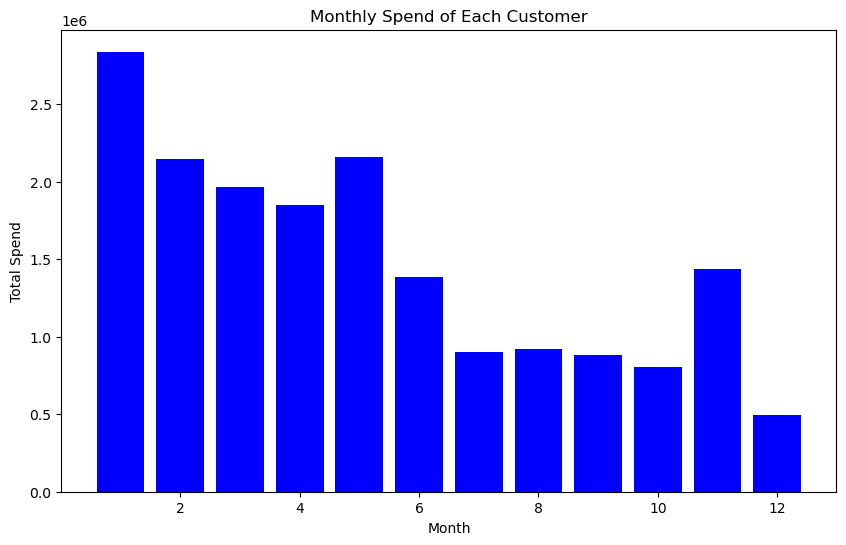

In [31]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.bar(monthly_spend['Month'], monthly_spend['TotalSpend'], color='blue')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Monthly Spend of Each Customer')
plt.show()